In [ ]:
import math

import matplotlib.pyplot as plt
from functionLibrary import fwdEuler

f = lambda x, y: (y*math.log(y))/x

t1, s1 = fwdEuler(f, 2, 7, 0.5, 2.71828)
t2, s2 = fwdEuler(f, 2, 7, 0.2, 2.71828)
t3, s3 = fwdEuler(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
import math
import matplotlib.pyplot as plt 
from functionLibrary import bwdEuler


t1, s1 = bwdEuler(2, 7, 0.5, 2.71828)
t2, s2 = bwdEuler(2, 7, 0.2, 2.71828)
t3, s3 = bwdEuler(2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Implicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
from functionLibrary import predCorr
f = lambda y, x: (y*math.log(y))/x

t1, s1 = predCorr(f, 2, 7, 0.5, 2.71828)
t2, s2 = predCorr(f, 2, 7, 0.2, 2.71828)
t3, s3 = predCorr(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()



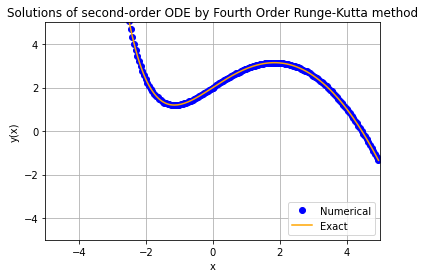

In [2]:
import math
import matplotlib.pyplot as plt
from functionLibrary import rk4_secondOrder

def F1(y, u, x):
    return u

def F2(y, u, x):
    return (1-u-x)

    
x_list, y_list = rk4_secondOrder(F1, F2, 0, 5.0, 0.05, 2, 1)
x_back, y_back = rk4_secondOrder(F1, F2, 0, -5, -0.05, 2, 1)

x_min = -5.0
x_max = 5.0
step_size = 0.05
xExact = []
yExact = []

for i in range(math.ceil((x_max-x_min)/step_size)):
    xExact.append(x_min)
    x_min = x_min + step_size
for i in range(len(xExact)):
    yExact.append(2.0*xExact[i] - (1/2)*xExact[i]**2 + (math.exp(-xExact[i])) + 1.0)



plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot(x_list, y_list, 'o', color = 'blue', label = 'Numerical')
plt.plot(x_back, y_back, 'o', color = 'blue')
plt.plot(xExact, yExact, color = 'orange', label = 'Exact')
plt.title('Solutions of second-order ODE by Fourth Order Runge-Kutta method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

NameError: name 'x_back' is not defined

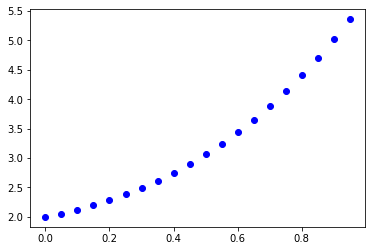

In [1]:
import math
import matplotlib.pyplot as plt
from functionLibrary import rk4_secondOrder


def F1(y, u, x):
    return u

def F2(y, u, x):
    return (2*y)

    
x_list, y_list = rk4_secondOrder(F1, F2, 0, 1, 0.05, 2, 1)
#x_back, y_back = rk4_secondOrder(F1, F2, 0, -5, -0.05, 2, 1)





#plt.xlim(-5, 5)
#plt.ylim(-5, 5)
plt.plot(x_list, y_list, 'o', color = 'blue', label = 'Numerical')
plt.plot(x_back, y_back, 'o', color = 'blue')

plt.title('Solutions of second-order ODE by Fourth Order Runge-Kutta method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
from functionLibrary import rk4_secondOrder

def F1(y, u, x):
    return u

def F2(y, u, x):
    return ((-(math.pi)**2*y))


def shooting(F1, F2, a, b, y_0, y_f, z_guess, h):
    tol = 1e-12
    x_trial, y_trial = rk4_secondOrder(F1, F2, a, b, h, y_0, z_guess)
    y_last = y_trial.pop()
    if abs(y_last-y_f)>tol:
        if y_last > y_f:
            z_high = z_guess
            print("Overshooting guess: ", z_high)
            y_high = y_last

            while y_last>=y_f: #running loop by reducing the guess value by 1 each time, till a undershooting guess is obtained
                z_guess=z_guess-1
                X,Y=rk4_secondOrder(F1, F2, a, b, h, y_0, z_guess)
                y_last = Y.pop()

            z_l=z_guess #storing the undershoot guess
            print('Obtained Undershooting Guess:', z_l)
            y_l=y_last
        elif y_last<=y_f: #if the obtained y(x_f) undershoots the analytical boundary value
            z_l=z_guess
            print('Undershooting Guess:', z_l)
            y_l=y_last
            while y_last<=y_f: #running loop by increasing the guess value by 1 each time, till a overshooting guess is obtained
                z_guess=z_guess+1
                X,Y=rk4_secondOrder(F1,F2,a,b,h,y_0,z_guess)
                yn = Y.pop()

            z_high=z_guess #storing the undershoot guess
            print('Obtained Overshooting Guess:', z_high)
            y_high=y_last
        #after having the guesses bracketing the analytical solution we find the actual value of slope at the initial point
        z= z_l + (z_high - z_l) * (y_f-y_l)/(y_high-y_l) #lagrange interpolation

        X,Y=rk4_secondOrder(F1,F2,a,b,h,y_0,z_guess)
        y_i=Y.pop() #solution at the boundary value obtained by the slope at initial point obtained from lagrange interpolation
        while (y_i-y_f)>tol: #running loops of lagrange interpolation till the obtained y(x_f) is close enough to analytical value
            z = z_l + (z_high - z_l) * (y_f - y_l) / (y_high - y_l)
            X, Y = rk4_secondOrder(F1,F2,a,b,h,y_0,z_guess)
            y_i = Y.pop()
        Xf,Yf=rk4_secondOrder(F1,F2,a,b,h,y_0,z_guess)
        return Xf,Yf,z
    else: #the guess bang on lands at the solution
        print("The guess z=",z_guess," is perfect!")
        Xf, Yf = rk4_secondOrder(F1,F2,a,b,h,y_0,z_guess)
        return Xf, Yf, z_guess

x_trial, y_trial, final_guess = shooting(F1, F2, 0, 2, 0, 0, 5, 0.01)
plt.plot(x_trial, y_trial, 'o', color = 'blue', label = 'Numerical')
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
from functionLibrary import rk4_secondOrder

def F1(y, u, x):
    return u

def F2(y, u, x):
    return ((-(math.pi)**2*y)/4)


def forward_euler(dydx, y0, x0, xf, step_size):
    """ Yields solution from x=x0 to x=xf """
    x = []
    y = []
    x.append(x0)
    y.append(y0)

    n = int((xf-x0)/step_size)      # no. of steps
    for i in range(n):
        x.append(x[i] + step_size)

    for i in range(n):
        y.append(y[i] + step_size * dydx(y[i], x[i]))

    return x, y

# Solves differential equation using Runge-Kutta method
def runge_kutta(d2ydx2, dydx, x0, y0, z0, xf, step_size):
    """ Yields solution from x=x0 to x=xf
    y(x0) = y0 & y'(x0) = z0
    z = dy/dx
    """
    x = []
    y = []
    z = []      # dy/dx
    x.append(x0)
    y.append(y0)
    z.append(z0)

    n = int((xf-x0)/step_size)      # no. of steps
    for i in range(n):
        x.append(x[i] + step_size)
        k1 = step_size * dydx(x[i], y[i], z[i])
        l1 = step_size * d2ydx2(x[i], y[i], z[i])
        k2 = step_size * dydx(x[i] + step_size/2, y[i] + k1/2, z[i] + l1/2)
        l2 = step_size * d2ydx2(x[i] + step_size/2, y[i] + k1/2, z[i] + l1/2)
        k3 = step_size * dydx(x[i] + step_size/2, y[i] + k2/2, z[i] + l2/2)
        l3 = step_size * d2ydx2(x[i] + step_size/2, y[i] + k2/2, z[i] + l2/2)
        k4 = step_size * dydx(x[i] + step_size, y[i] + k3, z[i] + l3)
        l4 = step_size * d2ydx2(x[i] + step_size, y[i] + k3, z[i] + l3)

        y.append(y[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        z.append(z[i] + (l1 + 2*l2 + 2*l3 + l4)/6)

    return x, y, z


# Returns the result of Lagrange's interpolation formula
def lagrange_interpolation(zeta_h, zeta_l, yh, yl, y):
    zeta = zeta_l + (zeta_h - zeta_l) * (y - yl)/(yh - yl)
    return zeta


# Solves 2nd order ODE given Dirichlet boundary conditions
def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):
    '''x0: Lower boundary value of x
    y0 = y(x0)
    xf: Upper boundary value of x
    yf = y(xf)
    z = dy/dx
    '''
    x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess1, xf, step_size)
    yn = y[-1]

    if abs(yn - yf) > tol:
        if yn < yf:
            zeta_l = z_guess1
            yl = yn

            x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess2, xf, step_size)
            yn = y[-1]

            if yn > yf:
                zeta_h = z_guess2
                yh = yn

                # calculate zeta using Lagrange interpolation
                zeta = lagrange_interpolation(zeta_h, zeta_l, yh, yl, yf)

                # using this zeta to solve using RK4
                x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, zeta, xf, step_size)
                return x, y, z

            else:
                print("Bracketing FAIL! Try another set of guesses.")


        elif yn > yf:
            zeta_h = z_guess1
            yh = yn

            x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess2, xf, step_size)
            yn = y[-1]

            if yn < yf:
                zeta_l = z_guess2
                yl = yn

                # calculate zeta using Lagrange interpolation
                zeta = lagrange_interpolation(zeta_h, zeta_l, yh, yl, yf)

                x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, zeta, xf, step_size)
                return x, y, z

            else:
                print("Bracketing FAIL! Try another set of guesses.")


    else:
        return x, y, z         # bang-on solution with z_guess1

x_trial, y_trial, final_guess = shooting(F1, F2, 0, 2, 0, 0, 5, 0.01)
plt.plot(x_trial, y_trial, 'o', color = 'blue', label = 'Numerical')
plt.show()

In [ ]:
from functionLibrary import Avg
import matplotlib.pyplot as plt
import numpy as np
import math
def linear_fit(X,Y):

    if len(X)!=len(Y):
        print('Invalid input!')
    else:
        n=len(X)
        xbar=Avg(X)
        ybar=Avg(Y)
        S_xx=0
        S_xy = 0
        std_X=0
        std_Y=0
        for i in range(n):
            S_xx += X[i]**2-xbar**2
            S_xy += (X[i]*Y[i])-(xbar*ybar)
            std_X += ((X[i]-xbar)**2)/n
            std_Y += ((Y[i]-xbar)**2)/n
        b=S_xy/S_xx
        a=ybar-b*xbar
        sigma_x= math.sqrt(std_X)
        sigma_y =math.sqrt(std_Y)
        PearsonR=S_xy/((n)*sigma_x*sigma_y)
        return b,a,PearsonR

X=[1,2,3,4,5,6,7,8,9,10]
Y=[-0.75,2.21,2.93,4.09,5.2,5.99,8.58,7.80,9.25,30.69]
Z=[1,2,3,4,5,6,7,8,9,10]
b,a,r=linear_fit(X,Y)
plt.scatter(X,Y)
x=np.linspace(0,10)
plt.plot(x,a+b*x,'r--')
print(b,a,r)


plt.legend(["Numerical Value", "Analytical Value=12.57 units"])
plt.xlabel("N")
plt.ylabel("V(N)")
plt.title("Volume of Ellipsoid by Monte-Carlo Estimation")
plt.show()